In [1]:
import pandas as pd
import os
import re
pattern = r'[A-Za-z_0-9]+.csv'
path = 'C:/Users/Admin/Desktop/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/' 
df = pd.read_csv('Sales_April_2019.csv')
files_list=[]
for files in os.listdir():
    if re.match(pattern,files):
        files_list.append(files)
df1 = pd.DataFrame(columns=df.columns)
for files in files_list:
    df = pd.read_csv(files)
    df1 = pd.concat([df1,df])
df1.to_csv('Total_Sales_2019.csv', index=False)

In [2]:
all_data_csv = pd.read_csv('Total_Sales_2019.csv')
all_data_csv.dropna(inplace=True)
all_data_csv = all_data_csv[all_data_csv['Product'] != 'Product']
all_data_csv.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [3]:
all_data_csv['Order Date']= pd.to_datetime(all_data_csv['Order Date'], format='%m/%d/%y %H:%M')
all_data_csv['Month'] = all_data_csv['Order Date'].dt.month
all_data_csv['Quantity Ordered'] = pd.to_numeric(all_data_csv['Quantity Ordered'])
all_data_csv['Price Each'] = pd.to_numeric(all_data_csv['Price Each'])
all_data_csv['Total_Sales'] = all_data_csv['Quantity Ordered'] * all_data_csv['Price Each']
all_data_csv.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [4]:
# For each month total sales 
best_month = all_data_csv.groupby('Month').sum()
best_month

,Quantity Ordered,Price Each,Total_Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


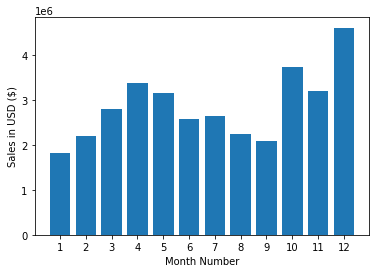

In [5]:
import matplotlib.pyplot as plt

plt.bar(best_month.index, best_month['Total_Sales'])
plt.xticks(best_month.index)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

In [6]:
all_data_csv['City'] = all_data_csv['Purchase Address'].str.split(",")
all_data_csv['City'] = all_data_csv['City'].str.get(1)
all_data_csv.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [7]:
best_sales_city = all_data_csv.groupby('City').sum()
best_sales_city

,Quantity Ordered,Price Each,Month,Total_Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


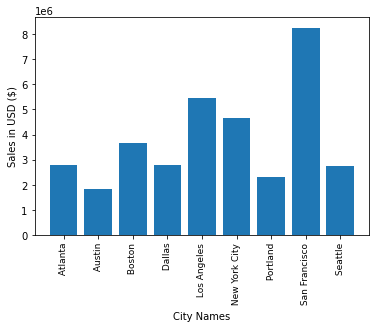

In [8]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data_csv.groupby('City')]
plt.bar(cities, best_sales_city['Total_Sales'])
plt.xticks(cities, rotation='vertical', size=9)
plt.xlabel('City Names')
plt.ylabel('Sales in USD ($)')
plt.show()

In [9]:
all_data_csv['Hour'] = all_data_csv['Order Date'].dt.hour
all_data_csv['Minute'] = all_data_csv['Order Date'].dt.minute
all_data_csv.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


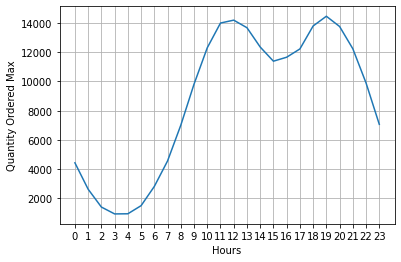

In [10]:
results = all_data_csv.groupby('Hour')
hours = [hours for hours, df in all_data_csv.groupby('Hour')]
plt.plot(hours, results['Quantity Ordered'].sum())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Quantity Ordered Max')
plt.show()

In [11]:
#What Products are most often sold together?
#product_results = results['Product'].agg(lambda x : '|'.join(x))
results = all_data_csv.groupby(['Order Date'])['Product']

all_data_csv['Products Sold Together'] = results.transform(lambda x : '|'.join(x))

In [30]:
#all_data_csv.drop(columns='Product Sold Together', inplace=True)
all_data_csv.head()
df = all_data_csv[['Order ID','Products Sold Together']].drop_duplicates()
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Products Sold Together']:
    sub_list = row.split('|')
    count.update(Counter(combinations(sub_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 2005),
 (('Google Phone', 'USB-C Charging Cable'), 1862),
 (('AAA Batteries (4-pack)', 'USB-C Charging Cable'), 1764),
 (('USB-C Charging Cable', 'Wired Headphones'), 1742),
 (('USB-C Charging Cable', 'AAA Batteries (4-pack)'), 1716),
 (('AAA Batteries (4-pack)', 'Lightning Charging Cable'), 1697),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 1687),
 (('USB-C Charging Cable', 'USB-C Charging Cable'), 1670),
 (('USB-C Charging Cable', 'Lightning Charging Cable'), 1669),
 (('AAA Batteries (4-pack)', 'AA Batteries (4-pack)'), 1657)]

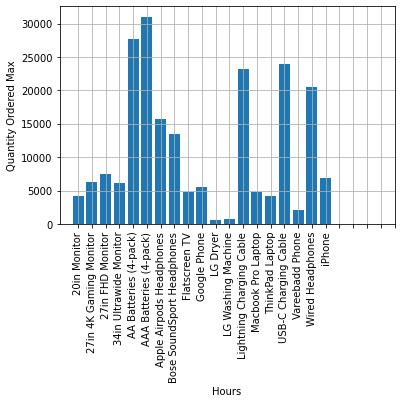

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


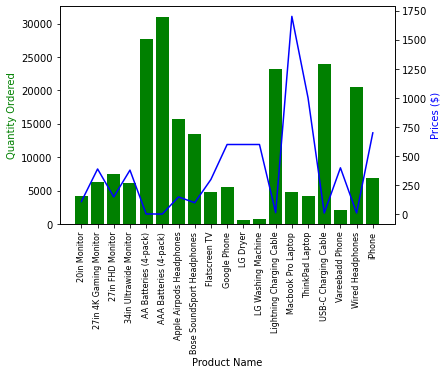

In [39]:
#which product sold the most?
product_group = all_data_csv.groupby('Product')
products = [product for product, df in product_group]
quantity_ordered = product_group['Quantity Ordered'].sum()
plt.bar(products, quantity_ordered)
plt.xticks(hours, rotation='vertical')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Quantity Ordered Max')
plt.show()

# To add y-Label as the secondary y-label to the existing chart
prices = all_data_csv.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered, color ='g')
ax2.plot(products,prices, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()